## Plots for the SLR210 Project

**Imports and fetching the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

from importlib import reload
reload(plt)
%matplotlib widget


# Load the benchmark data from the CSV file
df = pd.read_csv('benchmark_data_v2.csv')


Line plot of the latency with varrying N and fixed tle.

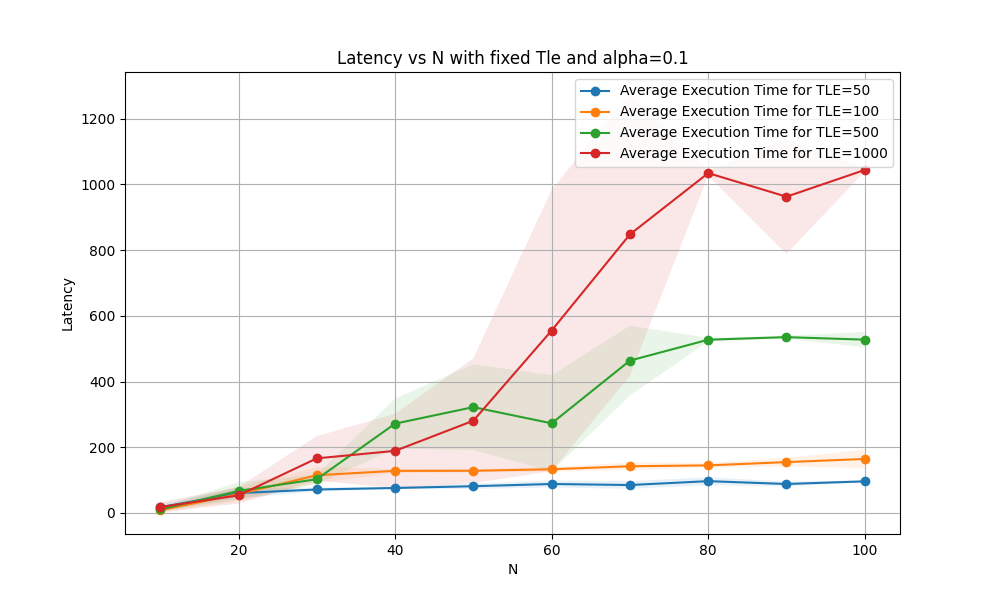

In [33]:
# Line Plot - Latency vs N for fixed tle and alpha
fixed_alpha = 0.1  # Choose a fixed value of alpha
subset = df[(df['Alpha'] == fixed_alpha)]
plt.figure(figsize=(10, 6))
for tle, group in subset.groupby('Tle'):
    avg_execution_times = group.groupby('N')['Execution Time'].mean()
    std_execution_times = group.groupby('N')['Execution Time'].std()
    parameter_values = group['N'].unique()
    plt.plot(parameter_values, avg_execution_times, marker='o', label=f'Average Execution Time for TLE={tle}')
    plt.fill_between(parameter_values, 
                 np.array(avg_execution_times) - np.array(std_execution_times), 
                 np.array(avg_execution_times) + np.array(std_execution_times),
                 alpha=0.1)
plt.xlabel('N')
plt.ylabel('Latency')
plt.title(f'Latency vs N with fixed Tle and alpha={fixed_alpha}')
plt.legend()
plt.grid(True)
plt.show()

Line plot of the latency with varrying Tle and fixed N and alpha = 0.1.

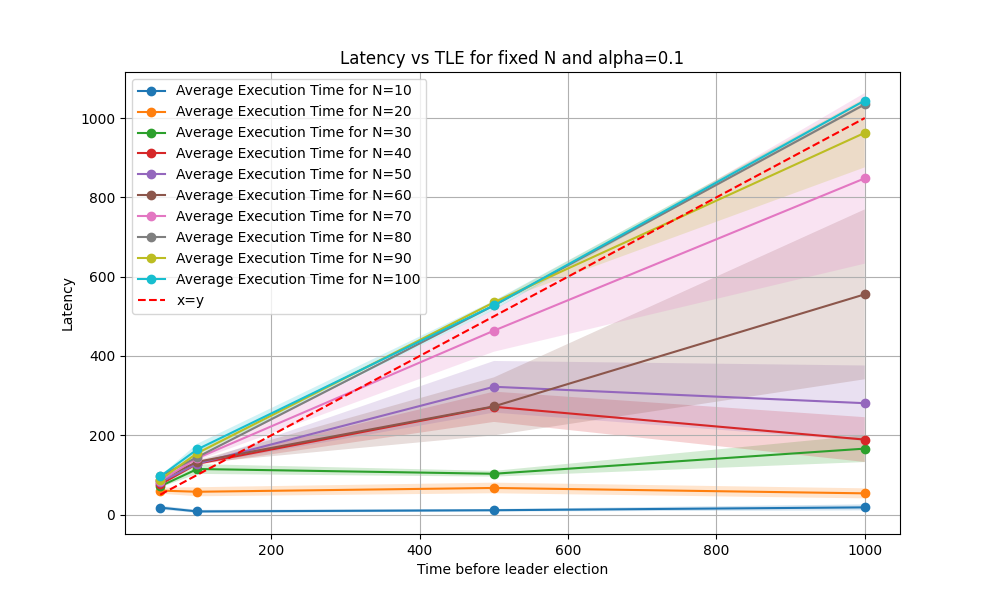

In [49]:
# Line Plot - Latency vs TLE for fixed N and alpha
fixed_alpha = 0.1  # Choose a fixed value of alpha
subset = df[(df['Alpha'] == fixed_alpha)]
plt.figure(figsize=(10, 6))
for N, group in subset.groupby('N'):
    avg_execution_times = group.groupby('Tle')['Execution Time'].mean()
    std_execution_times = group.groupby('Tle')['Execution Time'].std() /2
    parameter_values = group['Tle'].unique()
    plt.plot(parameter_values, avg_execution_times, marker='o', label=f'Average Execution Time for N={N}')
    plt.fill_between(parameter_values, 
                 np.array(avg_execution_times) - np.array(std_execution_times), 
                 np.array(avg_execution_times) + np.array(std_execution_times),
                 alpha=0.2)

# Plotting the line x = y
plt.plot(subset['Tle'], subset['Tle'], label='x=y', linestyle='--', color='red')

plt.xlabel('Time before leader election')
plt.ylabel('Latency')
plt.title(f'Latency vs TLE for fixed N and alpha={fixed_alpha}')
plt.legend()
plt.grid(True)
plt.show()




# # Without N = 100
# plt.figure(figsize=(10, 6))
# for N, group in subset.groupby('N'):
#     if N != 100:
#         plt.plot(group['Tle'], group['Execution Time'], label=f'N={N}')
# plt.ylim(0, 25)
# plt.xlabel('Time before leader election')
# plt.ylabel('Latency')
# plt.title(f'Latency vs TLE for fixed N and alpha={fixed_alpha}')
# plt.legend()
# plt.grid(True)
# plt.show()

# # With only N = 100
# plt.figure(figsize=(10, 6))

# plt.plot(group['Tle'], group['Execution Time'], label=f'N=100')
# # Plotting the line x = y
# plt.plot(group['Tle'], group['Tle'], label='x=y', linestyle='--', color='red')
# plt.xlabel('Time before leader election')
# plt.ylabel('Latency')
# plt.title(f'Latency vs TLE for fixed N and alpha={fixed_alpha}')
# plt.legend()
# plt.grid(True)
# plt.show()

Line Plot - Latency vs alpha for fixed tle and N = 100

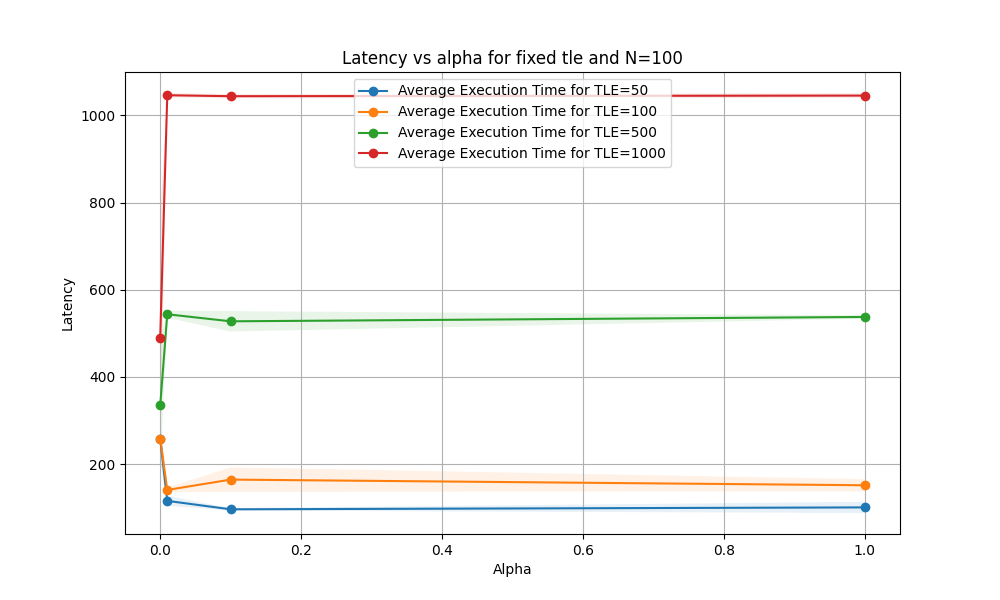

In [2]:
# Line Plot - Latency vs alpha for fixed tle and N = 100
fixed_N = 100  # Choose a fixed value of N
subset = df[(df['N'] == fixed_N)]
plt.figure(figsize=(10, 6))
for tle, group in subset.groupby('Tle'):
    avg_execution_times = group.groupby('Alpha')['Execution Time'].mean()
    std_execution_times = group.groupby('Alpha')['Execution Time'].std()
    parameter_values = group['Alpha'].unique()
    plt.plot(parameter_values, avg_execution_times, marker='o', label=f'Average Execution Time for TLE={tle}')
    plt.fill_between(parameter_values, 
                 np.array(avg_execution_times) - np.array(std_execution_times), 
                 np.array(avg_execution_times) + np.array(std_execution_times),
                 alpha=0.1)

plt.xlabel('Alpha')
plt.ylabel('Latency')
plt.title(f'Latency vs alpha for fixed tle and N={fixed_N}')
plt.legend()
plt.grid(True)


plt.show()

Heatmap of the latency for varryinf N and tle.
Usefull for interpreting both varrying tle with fixed N (raw) and varrying N with fixed tle (column).

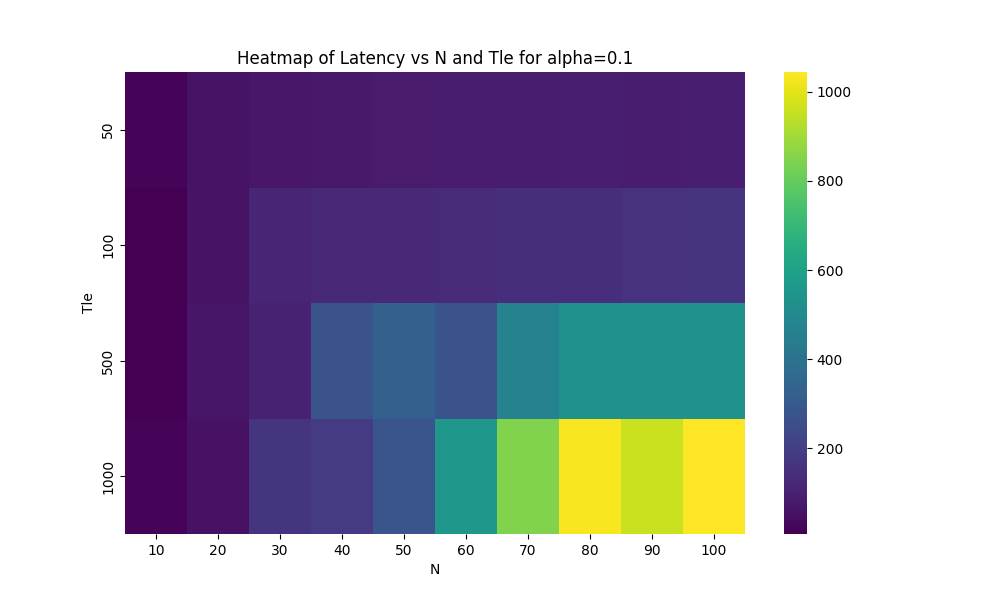

In [3]:
# Heatmap - Latency vs N and tle for fixed alpha
fixed_alpha = 0.1  # Choose a fixed value of alpha
subset = df[df['Alpha'] == fixed_alpha]
pivot = subset.pivot_table(index='Tle', columns='N', values='Execution Time')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='viridis')
plt.xlabel('N')
plt.ylabel('Tle')
plt.title(f'Heatmap of Latency vs N and Tle for alpha={fixed_alpha}')
plt.show()


Heatmap - Latency vs alpha and tle for fixed N

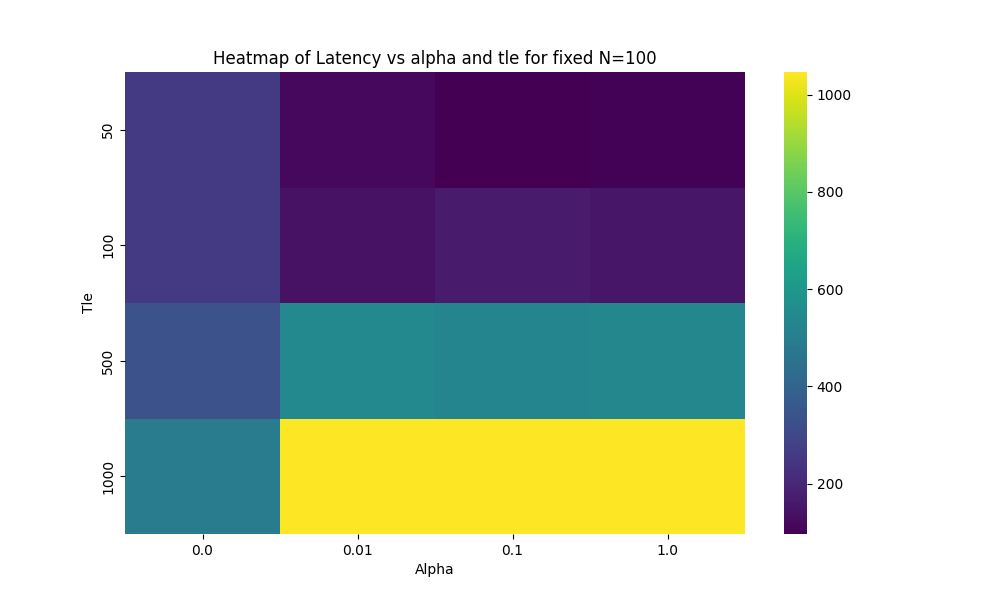

In [4]:
# Heatmap - Latency vs alpha and tle for fixed N
fixed_N = 100  # Choose a fixed value of N
subset = df[df['N'] == fixed_N]
pivot = subset.pivot_table(index='Tle', columns='Alpha', values='Execution Time')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='viridis')
plt.xlabel('Alpha')
plt.ylabel('Tle')
plt.title(f'Heatmap of Latency vs alpha and tle for fixed N={fixed_N}')
plt.show()

Heatmap - Latency vs alpha and N for fixed Tle

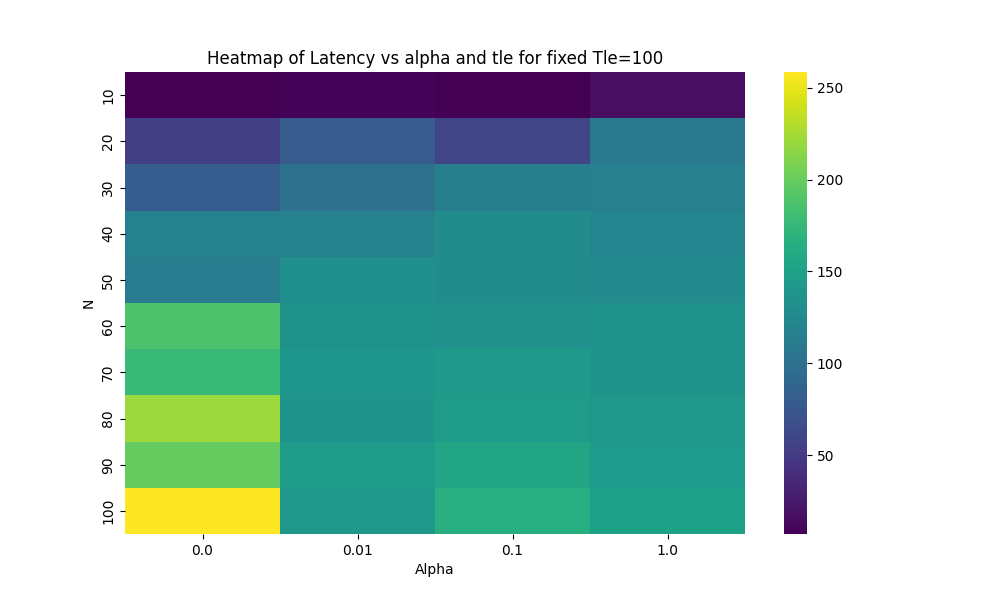

In [7]:
# Heatmap - Latency vs alpha and N for fixed Tle
fixed_tle = 100  # Choose a fixed value of Tle
subset = df[df['Tle'] == fixed_tle]
pivot = subset.pivot_table(index='N', columns='Alpha', values='Execution Time')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='viridis')
plt.xlabel('Alpha')
plt.ylabel('N')
plt.title(f'Heatmap of Latency vs alpha and tle for fixed Tle={fixed_tle}')
plt.show()

/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_25820/2484447222.py:8: FutureWarning: The provided callable <function mean at 0x10d85d120> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)


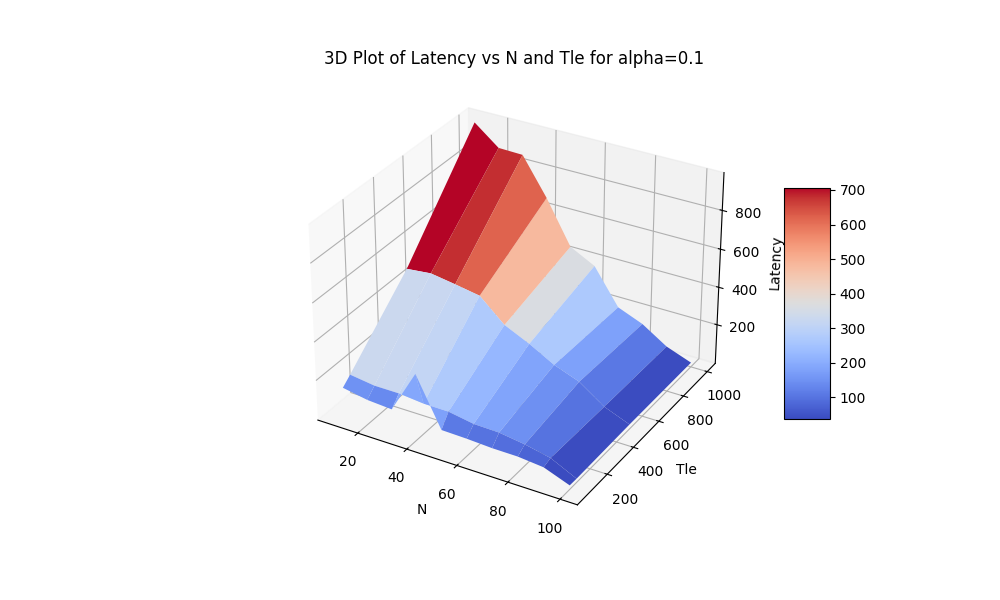

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for N and Tle
pivot = df.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)
pivot.columns = pivot.columns[::-1]
N_values = pivot.columns.astype(float).tolist()
tle_values = pivot.index.astype(float).tolist()
N_mesh, Tle_mesh = np.meshgrid(N_values, tle_values)

# Convert dataframe values to array
latency_values = pivot.values

# Plot surface
surf = ax.plot_surface(N_mesh, Tle_mesh, latency_values, cmap='coolwarm')



# Add labels and title
ax.set_xlabel('N')
ax.set_ylabel('Tle')
ax.set_zlabel('Latency')
ax.set_title(f'3D Plot of Latency vs N and Tle for alpha={fixed_alpha}')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)


# Show plot
plt.show()
